In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
file = open('../DSSwithPython-master/DSS-Week08/Data/adult.data')

In [3]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0

In [4]:
data = []
for line in file:
    data1 =line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],
                     data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),
                     data1[13],data1[14]])

In [5]:
print(data[1:3])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n'], [38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K\n']]


In [6]:
df = pd.DataFrame(data)
df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [7]:
df.shape

(32561, 15)

In [8]:
counts = df.groupby('country').size()
counts.head()

country
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64

In [9]:
counts =df.groupby('age').size()
counts.head()

age
17    395
18    550
19    712
20    753
21    720
dtype: int64

In [10]:
df_sex = df.groupby('sex').count()
df_sex.head(10)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,capital_gain,capital_loss,hr_per_week,country,income
sex,,,,,,,,,,,,,,
Female,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771,10771
Male,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790,21790


In [19]:
female = df[df['sex']=='Female']
print(female.shape)

(10771, 15)


In [31]:
male = df[df['sex']=='Male']
print(male.shape)

(21790, 15)


In [13]:
df['income'].unique()

array(['<=50K\n', '>50K\n'], dtype=object)

In [14]:
df_over50k = df[df['income']=='>50K\n']
df_over50k.shape

(7841, 15)

In [16]:
male_hi_income = df[(df['sex']=='Male') & (df['income']=='>50K\n')]
print('no. of male with high income is',male_hi_income.shape[0])
female_hi_income = df[(df['sex']=='Female') & (df['income']=='>50K\n')]
print('no. of female with high income is',female_hi_income.shape[0])

no. of male with high income is 6662
no. of female with high income is 1179


In [21]:
print ('The percentage of people with high income is:', int(df_over50k.shape[0]/df.shape[0]*100), '%.') 
print ('The percentage of men with high income is:', int(male_hi_income.shape[0]/male.shape[0]*100), '%.') 
print ('The percentage of women with high income is:' ,int(female_hi_income.shape[0]/female.shape[0]*100), '%.') 

The percentage of people with high income is: 24 %.
The percentage of men with high income is: 30 %.
The percentage of women with high income is: 10 %.


In [23]:
print('The average age of men is:',male['age'].mean())
print('The average age of women is:',female['age'].mean())

The average age of men is: 39.43354749885268
The average age of women is: 36.85823043357163


In [24]:
print('The average age of high-income men is:',male_hi_income['age'].mean())
print('The average age of high-income women is:',female_hi_income['age'].mean())

The average age of high-income men is: 44.62578805163614
The average age of high-income women is: 42.125530110262936


In [44]:
ml_mu = male.age.mean()
fl_mu = female.age.mean()
ml_var = male.age.var()
fl_var = female.age.var()
ml_std = male.age.std()
fl_std = female.age.std()
print('Statistics of age of  men are: mu =', ml_mu, 'var = ',ml_var,'std= ',ml_std)
print('Statistics of age of  women are: mu =', fl_mu, 'var = ',fl_var,'std= ',fl_std)

Statistics of age of  men are: mu = 39.43354749885268 var =  178.77375174529985 std=  13.370630192526448
Statistics of age of  women are: mu = 36.85823043357163 var =  196.3837063948063 std=  14.013697099438332


In [33]:
hr_ml_mu = male['hr_per_week'].mean()
hr_fl_mu = female['hr_per_week'].mean()
hr_ml_var = male['hr_per_week'].var()
hr_fl_var = female['hr_per_week'].var()
hr_ml_std = male['hr_per_week'].std()
hr_fl_std = female['hr_per_week'].std()
print('Statistics for hours per week of  men are: mu =', hr_ml_mu, 'var = ',hr_ml_var,'std= ',hr_ml_std)
print('Statistics for hours per week of  women are: mu =', hr_fl_mu, 'var = ',hr_fl_var,'std= ',hr_fl_std)

Statistics for hours per week of  men are: mu = 42.42808627810923 var =  146.88846717140746 std=  12.11975524387384
Statistics for hours per week of  women are: mu = 36.410361154953115 var =  139.50679700047422 std=  11.811299547487323


Lets calculate the median age of males and females in our dataset and also the median age of high-income men and women:

In [43]:
male_age_md = male.age.median()
female_age_md = female.age.median()
print('Median age of male is',male_age_md,'\n Median age of female is',female_age_md)
hi_male_age_md = male_hi_income.age.median()
hi_female_age_md = female_hi_income.age.median()
print('Median age of high income male is',hi_male_age_md,'\n Median age of high income female is',hi_female_age_md)

Median age of male is 38.0 
 Median age of female is 35.0
Median age of high income male is 44.0 
 Median age of high income female is 41.0


In [46]:
ml_hr_md = male.hr_per_week.median()
fl_hr_md = female.hr_per_week.median()
print('Median working hours per week of male is',ml_hr_md,'\n Median working hours per week of female is',fl_hr_md)


Median working hours per week of male is 40.0 
 Median working hours per week of female is 40.0


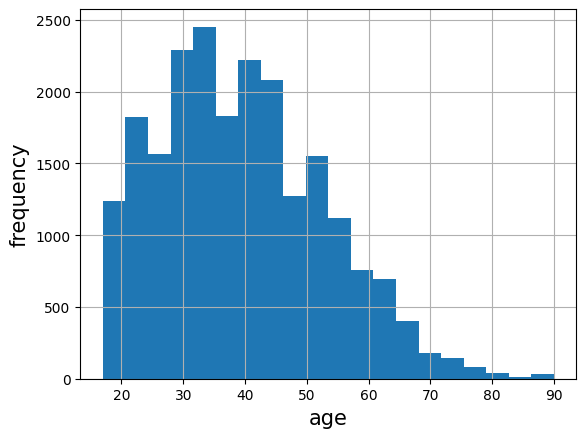

In [65]:
ml_age = male.age
plt.hist(ml_age, density=0, bins=20, histtype='stepfilled')
plt.xlabel('age', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.grid(True)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

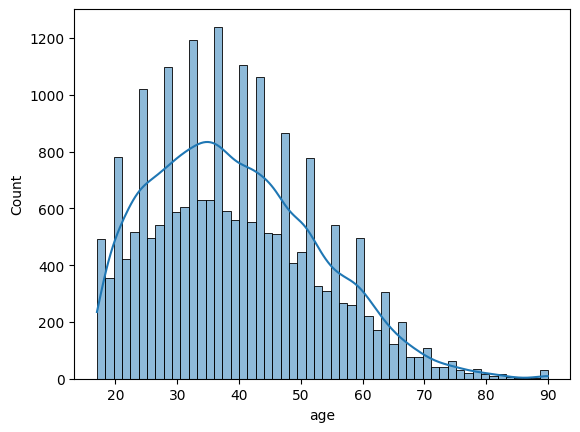

In [69]:
sns.histplot(ml_age, kde=True)

<Axes: xlabel='age', ylabel='Count'>

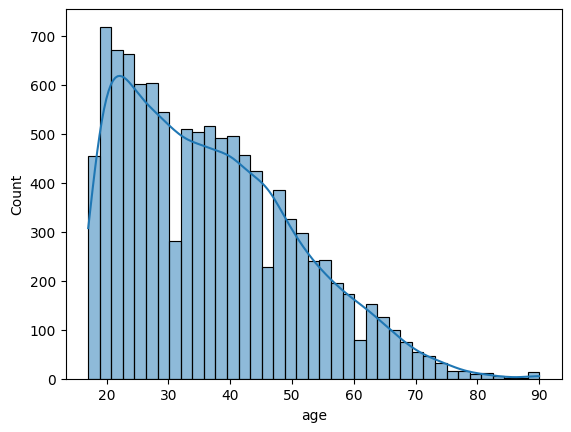

In [70]:
sns.histplot(female.age, kde=True)

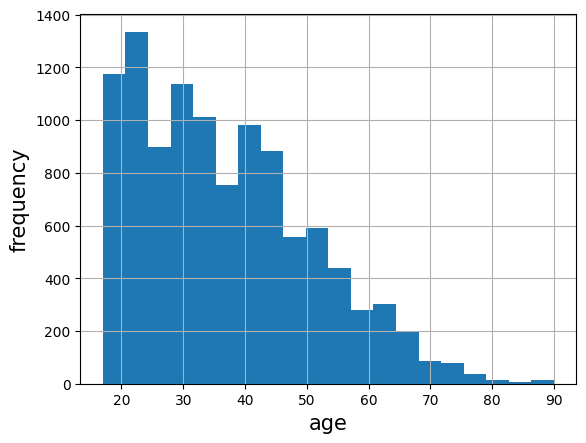

In [66]:
plt.hist(female.age, bins=20)
plt.xlabel('age', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.grid(True)
plt.show()

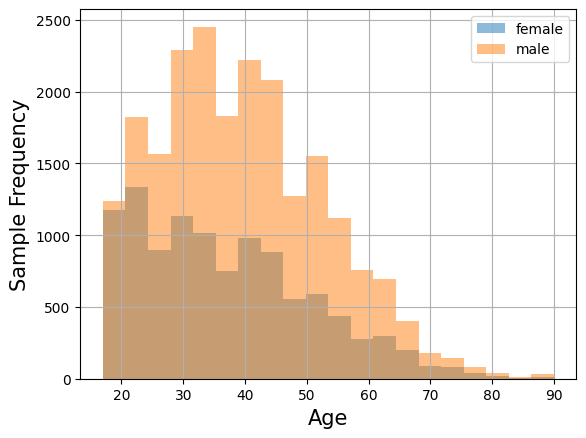

In [78]:
plt.hist(female.age, alpha=0.5, bins=20, density=0, label='female')
plt.hist(ml_age, alpha=0.5, bins=20,  density=0, label='male')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Sample Frequency', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

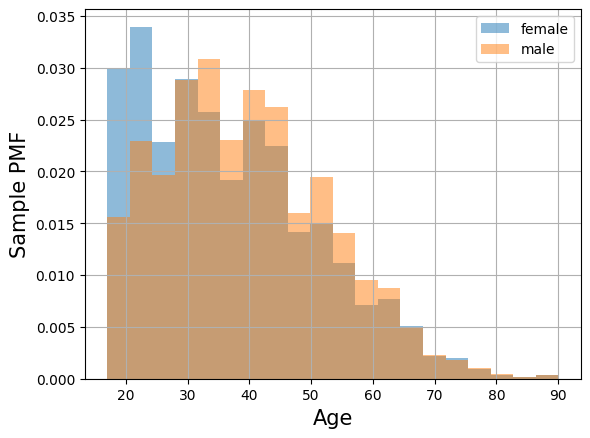

In [79]:
plt.hist(female.age, alpha=0.5, bins=20, density=1, label='female')
plt.hist(ml_age, alpha=0.5, bins=20,  density=1, label='male')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Sample PMF', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

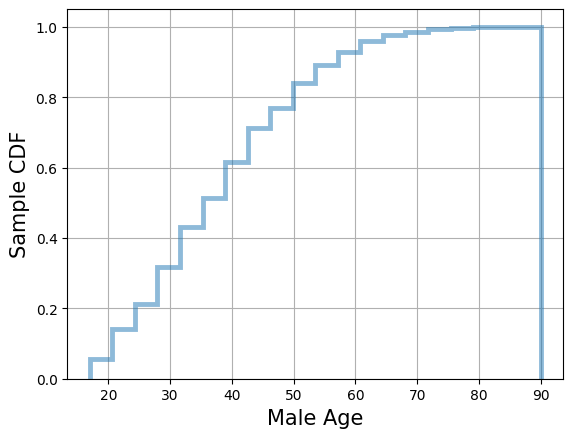

In [84]:

plt.hist(ml_age, alpha=0.5, bins=20,  density=1, label='male', cumulative=True, histtype='step', linewidth = 3.5)
plt.xlabel('Male Age', fontsize = 15)
plt.ylabel('Sample CDF', fontsize = 15)
plt.grid(True)

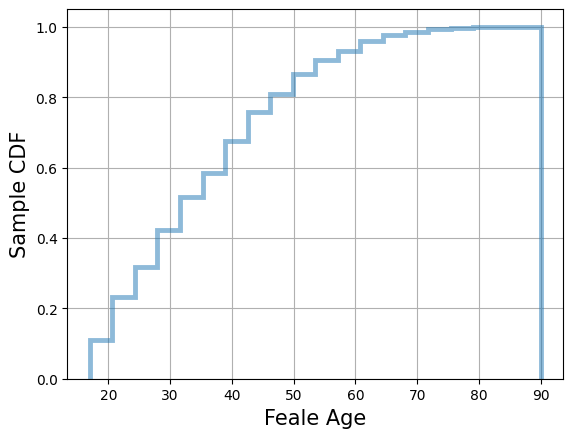

In [85]:

plt.hist(female.age, alpha=0.5, bins=20,  density=1,  cumulative=True, histtype='step', linewidth = 3.5)
plt.xlabel('Feale Age', fontsize = 15)
plt.ylabel('Sample CDF', fontsize = 15)
plt.grid(True)

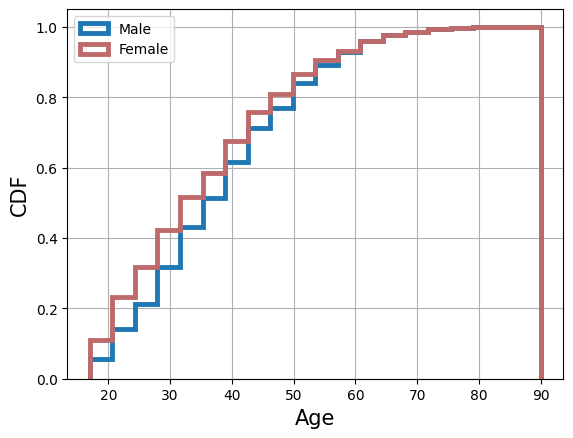

In [97]:
ml_age.hist(density=1, cumulative =1,  histtype='step', linewidth=3.5, bins=20, label='Male' )
female.age.hist(density=1, cumulative =1,  histtype='step', linewidth=3.5, bins=20, label='Female', color=sns.desaturate('indianred',0.75) )
plt.xlabel('Age', fontsize=15)
plt.ylabel('CDF', fontsize=15)
plt.legend()

For example, lets calculate the _age_ median, min and max from our data:

In [100]:
age_md = df.age.median()
age_min = df.age.min()
age_max = df.age.max()
print('For age, median is',age_md,'\n min is', age_min, '\n max is', age_max)

For age, median is 37.0 
 min is 17 
 max is 90


In [108]:
len(df[(df.income == '>50K\n') & (df.age < 22)])

5

In [109]:
len(df[(df.income == '>50K\n') & (df.age > 72)])

69

In [125]:
df2 = df.drop(df.index[( df.age > 72)])
df2 = df2.drop(df.index[( df.age < 22)])


In [126]:
df2 = df2[df2.income == '>50K\n']


In [127]:
print(df2.age.max(),df2.age.min(),df2.shape, df_over50k.shape)

72 22 (7767, 15) (7841, 15)


In [136]:
hi_ml = male_hi_income[male_hi_income.age >=22]
hi_ml = hi_ml[hi_ml.age <= 72]
outlier = male_hi_income.shape[0]-hi_ml.shape[0]
print(hi_ml.age.min(), hi_ml.age.max(), hi_ml.shape, male_hi_income.shape, outlier)


22 72 (6599, 15) (6662, 15) 63


In [138]:
hi_fl = female_hi_income[female_hi_income.age >=22]
hi_fl = hi_fl[hi_fl.age <= 72]
outlier = female_hi_income.shape[0]-hi_fl.shape[0]
print(hi_fl.age.min(), hi_fl.age.max(), hi_fl.shape, female_hi_income.shape, outlier)

22 72 (1168, 15) (1179, 15) 11


Lets calculate the mean, standard deviation and median for high income males wihtout outliers:

In [141]:
hi_ml2_mu = hi_ml.age.mean()
hi_ml2_std = hi_ml.age.std()
hi_ml2_md = hi_ml.age.median()
print(hi_ml2_mu,hi_ml2_std,hi_ml2_md)

44.325352326110014 10.012302742491938 44.0


In [142]:
hi_fl2_mu = hi_fl.age.mean()
hi_fl2_std = hi_fl.age.std()
hi_fl2_md = hi_fl.age.median()
print(hi_fl2_mu,hi_fl2_std,hi_fl2_md)

41.93236301369863 9.98952564884922 41.0


In [146]:
ml_age_mu_diff = male_hi_income.age.mean() - female_hi_income.age.mean() 
print(ml_age_mu_diff)
ml_age_mu_diff = hi_ml2_mu - hi_fl2_mu
print(ml_age_mu_diff)

2.5002579413732064
2.3929893124113875


The mean age difference between high income males and females (with outliers): 2.58.
The mean age difference between high income males and females (without outliers): 2.39.m

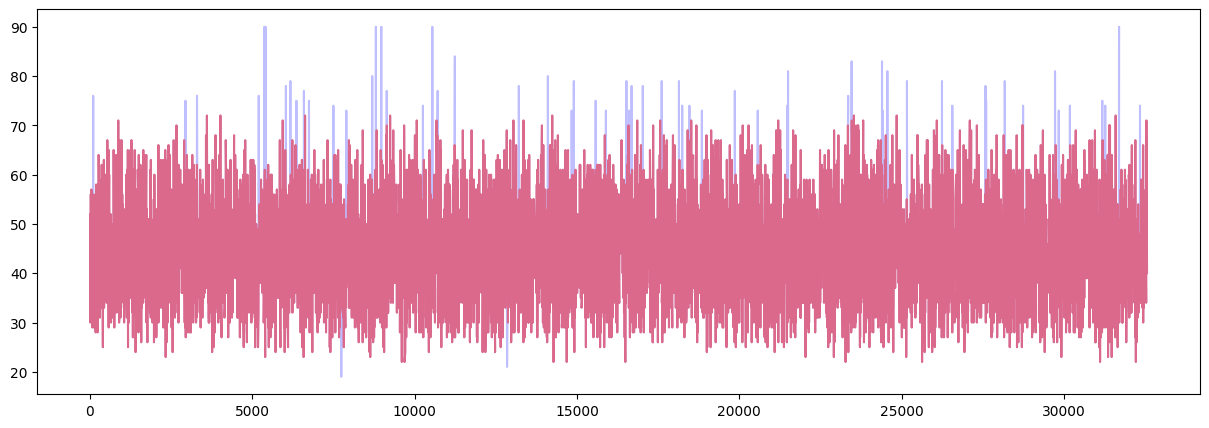

In [152]:
plt.figure(figsize=(15,5))
plt.plot(male_hi_income.age, alpha=0.25, color='blue')
plt.plot(hi_ml.age, alpha=0.45, color='red')

In [157]:
countx,divx = np.histogram(hi_ml.age,density=1)
print(countx, divx)

[0.00390968 0.01642673 0.02773147 0.03545992 0.03661161 0.03206546
 0.02182149 0.01557812 0.00691014 0.00348538] [22. 27. 32. 37. 42. 47. 52. 57. 62. 67. 72.]


<BarContainer object of 10 artists>

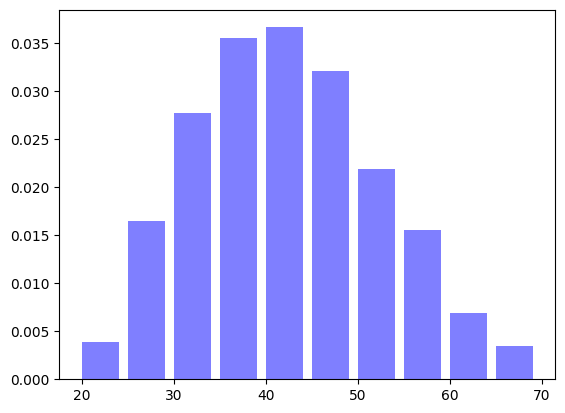

In [160]:
plt.bar(divx[:-1],countx,width=4, color='b', alpha=0.5)

In [164]:
count_f,div_f = np.histogram(hi_fl.age, density=1)
print(count_f,div_f)

[0.00736301 0.025      0.03219178 0.03921233 0.03356164 0.02671233
 0.01678082 0.01181507 0.00496575 0.00239726] [22. 27. 32. 37. 42. 47. 52. 57. 62. 67. 72.]


<BarContainer object of 10 artists>

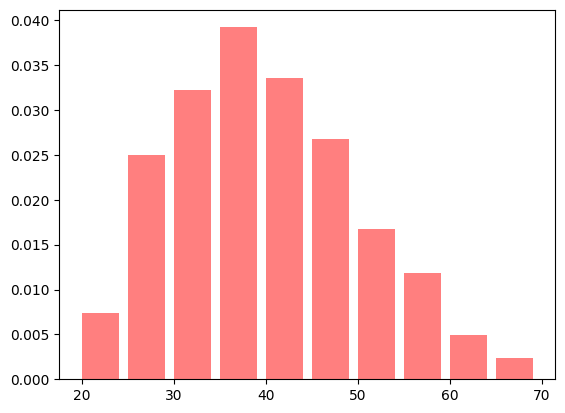

In [165]:
plt.bar(div_f[:-1], count_f, width=4, color ='r', alpha=0.5)

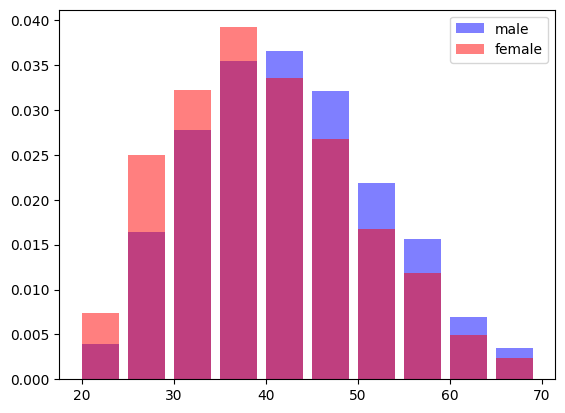

In [166]:
plt.bar(divx[:-1],countx,width=4, color='b', alpha=0.5, label='male')
plt.bar(div_f[:-1], count_f, width=4, color ='r', alpha=0.5, label='female')
plt.legend()

In [169]:
val = [(divx[i]+divx[i+1])/2 for i in range(len(divx)-1)]

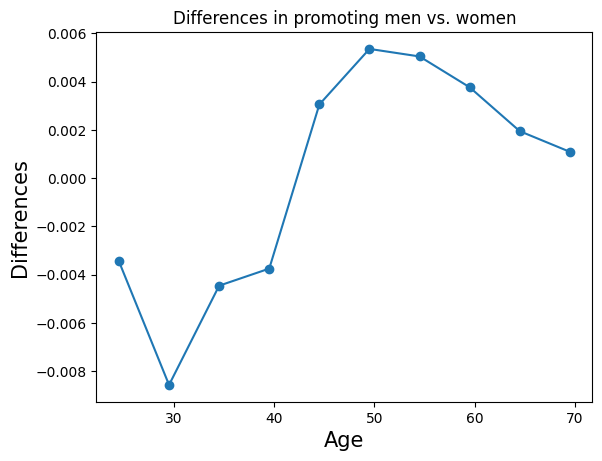

In [180]:
plt.plot(val,countx-count_f,'o-')
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show()

In [181]:
x = [0,1]
len(x)

2

In [182]:
import scipy

In [183]:
from scipy.stats import skew

In [187]:
dataset = [88, 85, 82, 97, 67, 77, 74, 86,  
           81, 95, 77, 88, 85, 76, 81] 

In [196]:
print(skew(hi_ml.age))

0.269337967630956


In [200]:
def skewness(x):
    res =0
    m = x.mean()
    s = x.std()
    for i in x:
        res+=(i-m)**3
    res/=(len(x)-1)*(s**3)
    return res
        


In [205]:
print('skewness of male is ',skewness(hi_ml.age))
print('skewness of female is ',skewness(hi_fl.age))

skewness of male is  0.2693175593742366
skewness of female is  0.4024625565978337


### Pearson's median skewness coefficient: a more robust alternative:

$$ g_p = \frac{3(\mu - \mu_{\frac{1}{2}})}{\sigma} $$

In [209]:
def pearson(x):
    return (3*(x.mean()-x.median()))/x.std()

In [207]:
def pearson(x):
    return 3*(x.mean()-x.median())*x.std()

In [210]:
print('pearson skewness of male is ',pearson(hi_ml.age))
print('pearson skewness of female is ',pearson(hi_fl.age))

pearson skewness of male is  0.09748576360837388
pearson skewness of female is  0.2800021882338428
